In [1]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import numpy as np
import seaborn as sns
from pandas.plotting import table
from time import time
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from matplotlib.ticker import AutoMinorLocator
from IPython.display import set_matplotlib_formats
color_pal = sns.color_palette()


D:\Miniconda\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [288]:
df =   pd.read_excel(r'D:/GC_ANN_2022/Projects/Downward parametric/ANN FINAL_DOWNWARD/UNRATE.xls')

df.describe()

,UNRATE
count,897.000000
mean,5.739799
std,1.701748
min,2.500000
25%,4.500000
50%,5.500000
75%,6.800000
max,14.700000


In [4]:
df.dtypes

observation_date    datetime64[ns]
UNRATE                     float64
dtype: object

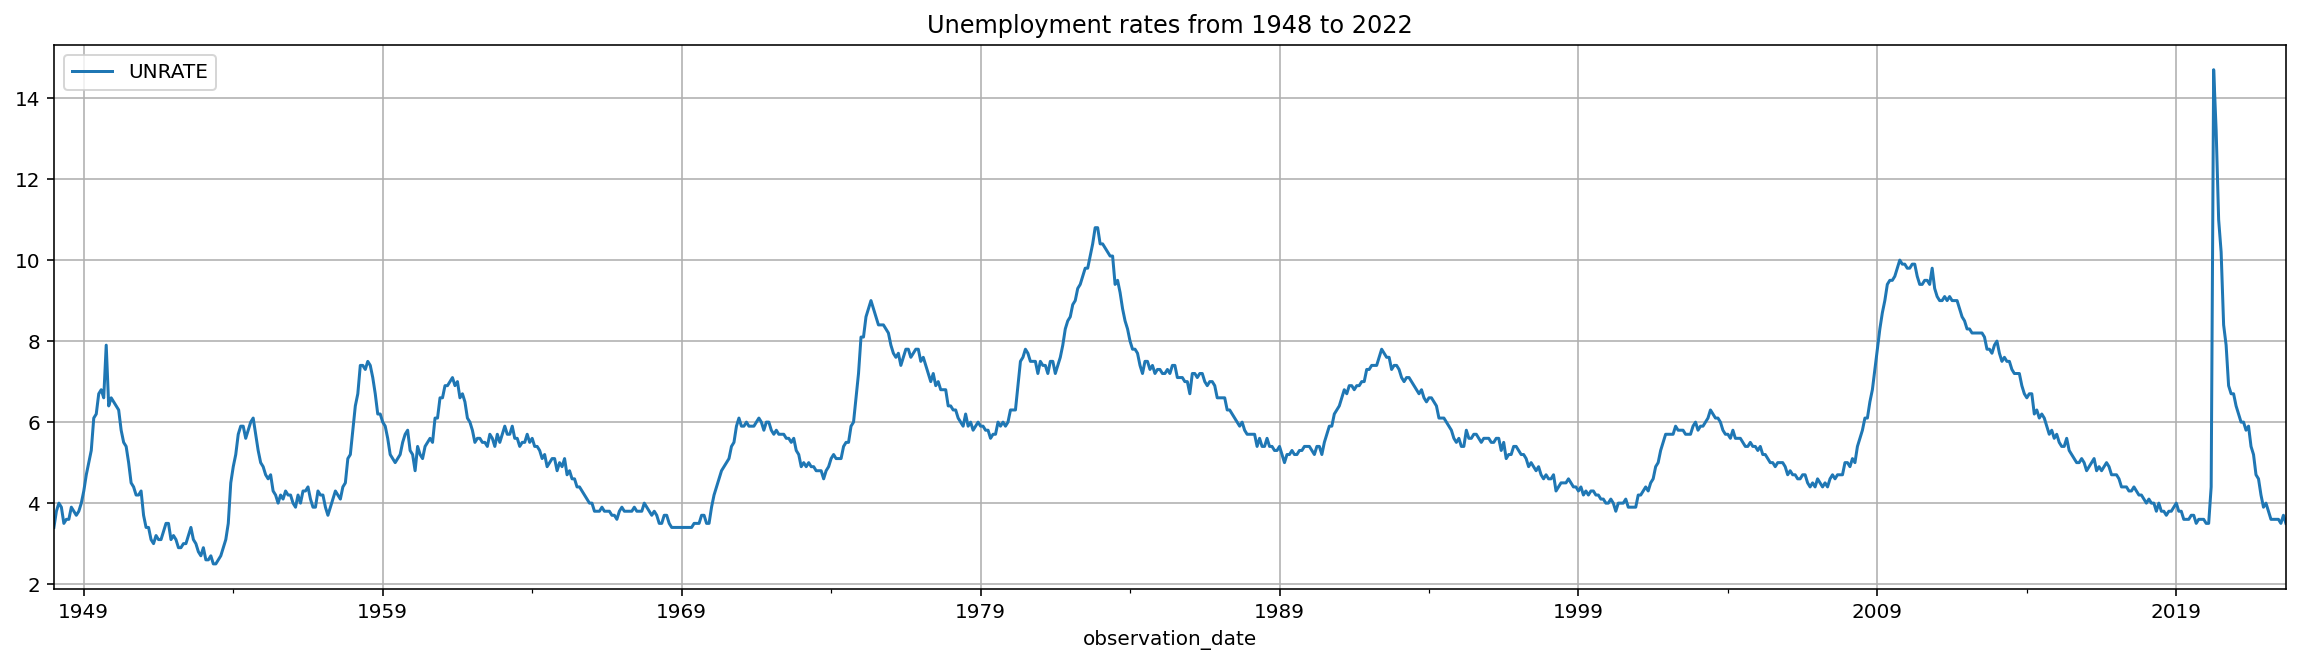

In [5]:
df.plot(x='observation_date',
        figsize=(20,5),
        color = color_pal[0], grid = True ,
        title = 'Unemployment rates from 1948 to 2022')
plt.show()

In [6]:
x1 = df.loc[df['observation_date'] <= '1958-12-01']
x2 = df.loc[(df['observation_date'] >= '1958-12-01') & (df['observation_date'] <= '1968-12-01')]
x3 = df.loc[(df['observation_date'] >= '1968-12-01') & (df['observation_date'] <= '1978-12-01')]
x4 = df.loc[(df['observation_date'] >= '1978-12-01') & (df['observation_date'] <= '1988-12-01')]
x5 = df.loc[(df['observation_date'] >= '1988-12-01') & (df['observation_date'] <= '1998-12-01')]
x6 = df.loc[(df['observation_date'] >= '1998-12-01') & (df['observation_date'] <= '2008-12-01')]
x7 = df.loc[(df['observation_date'] >= '2008-12-01')]

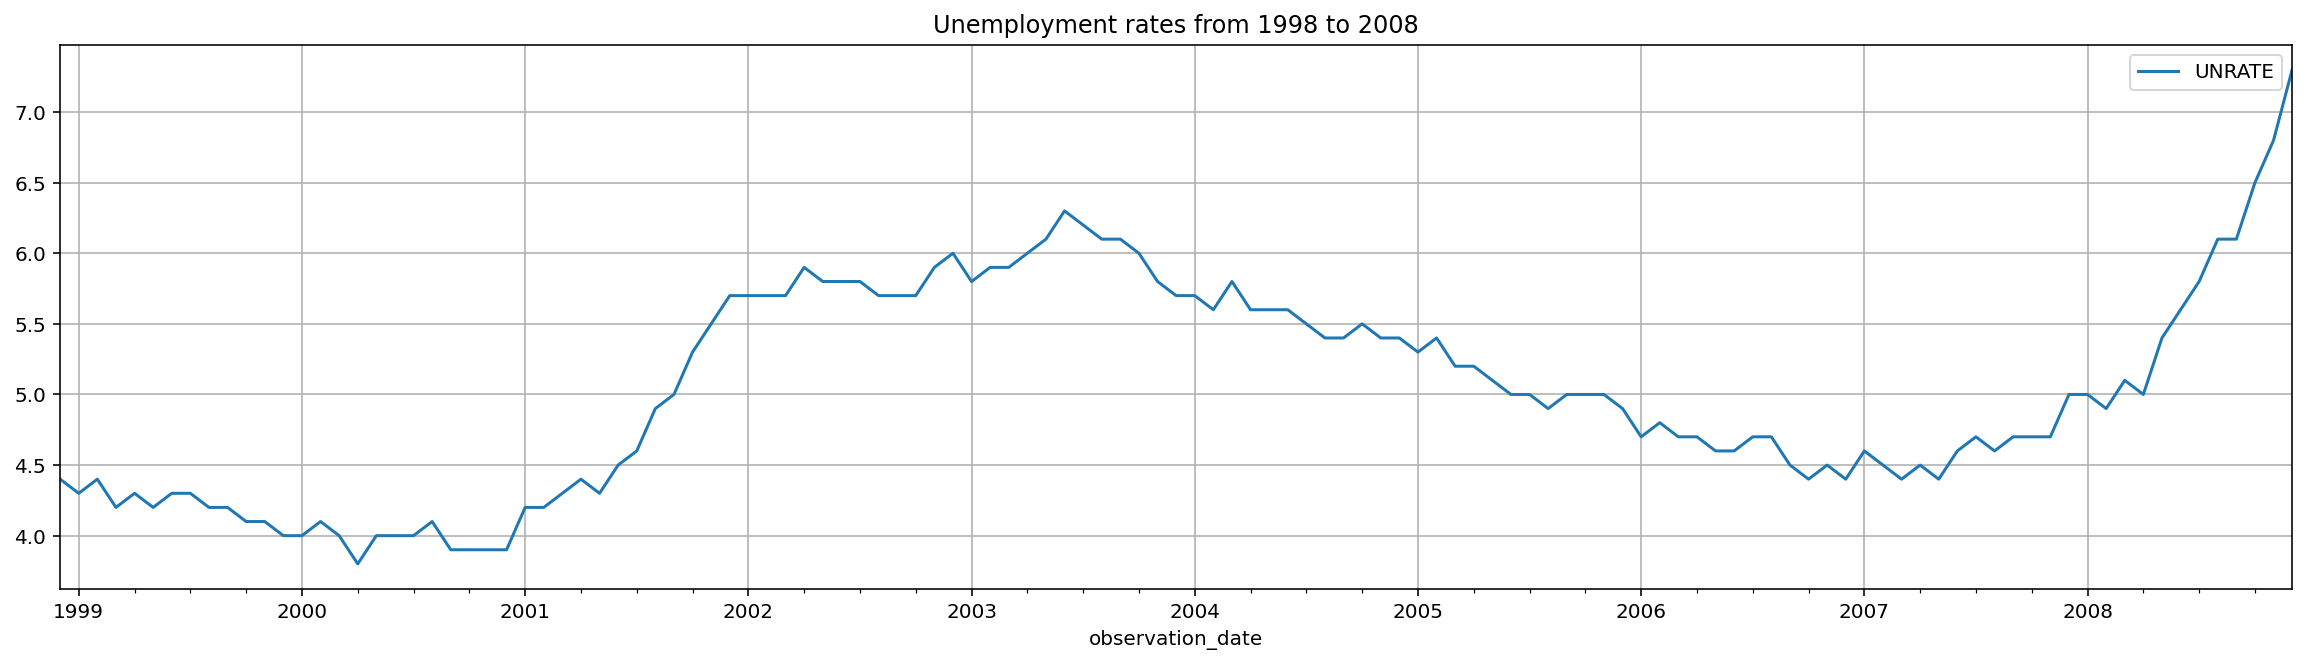

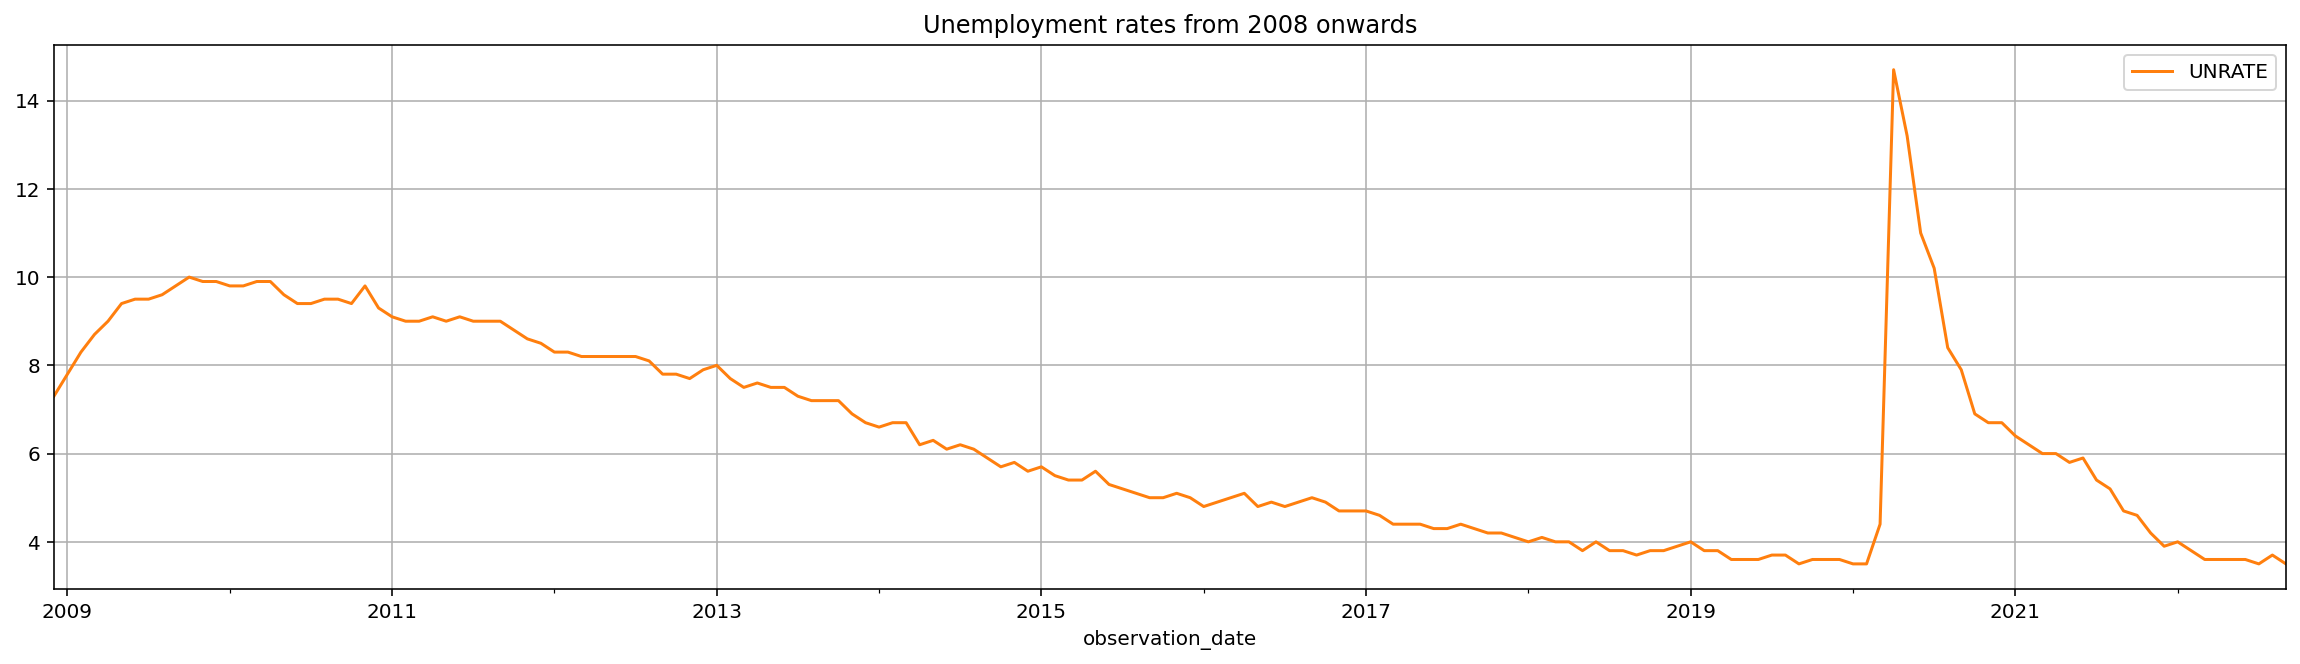

In [7]:
x6.plot(x='observation_date', 
        figsize=(20,5),
        color = color_pal[0], grid = True ,
        title = 'Unemployment rates from 1998 to 2008')


x7.plot(x='observation_date', 
        figsize=(20,5),
        color = color_pal[1], grid = True ,
        title = 'Unemployment rates from 2008 onwards')
plt.show()

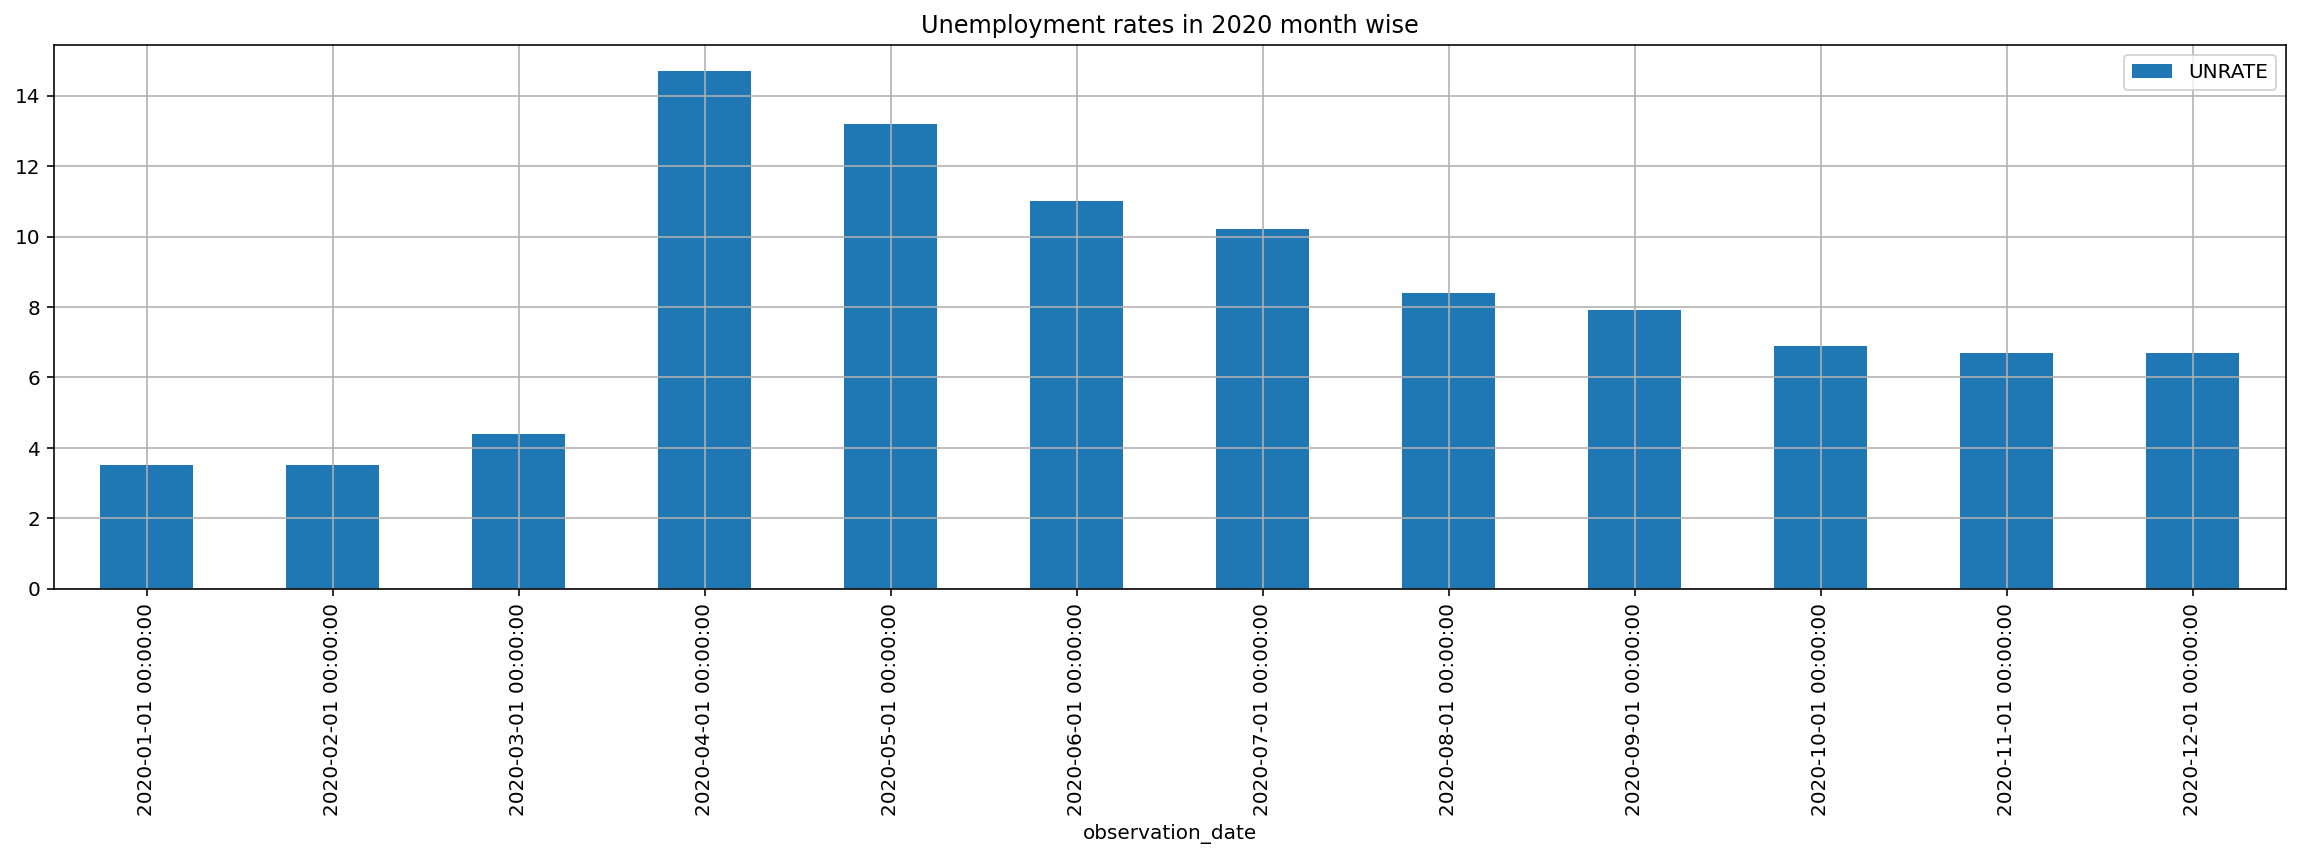

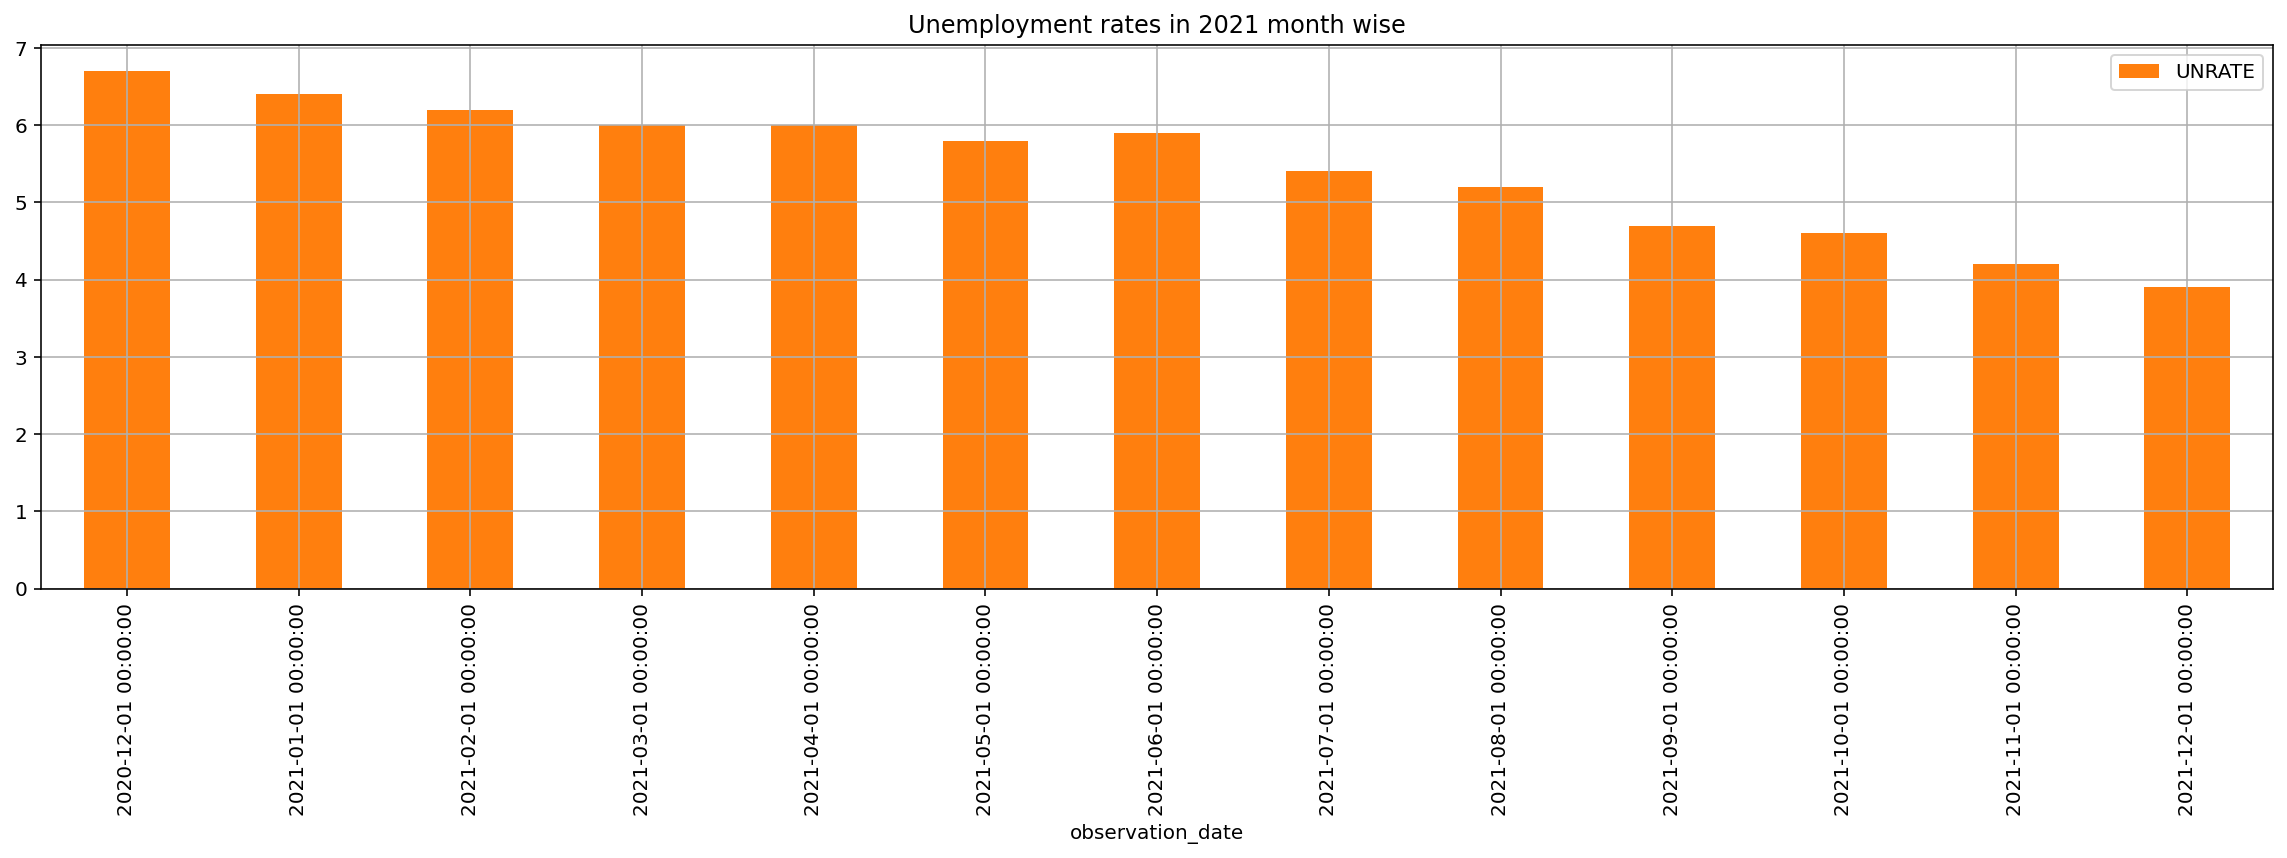

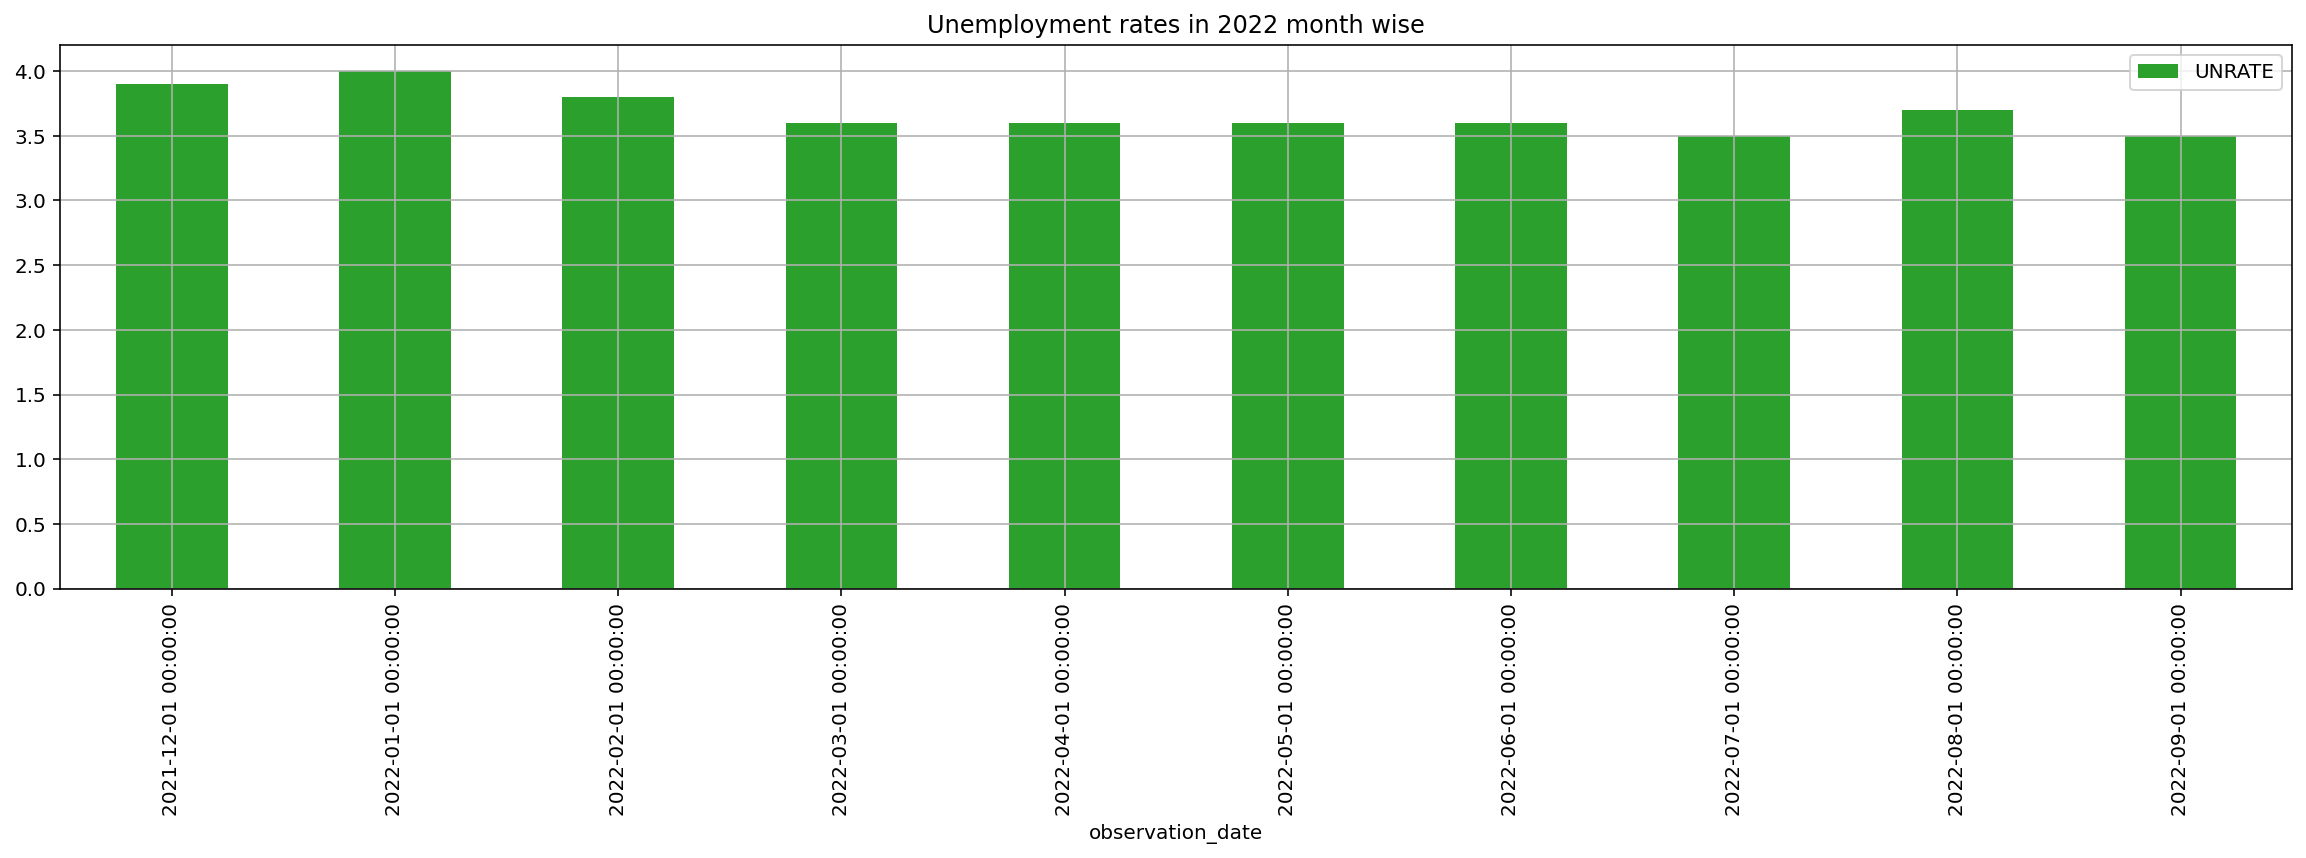

In [8]:
x8 = df.loc[(df['observation_date'] >= '2020-01-01') & (df['observation_date'] <= '2020-12-01')]
x9 = df.loc[(df['observation_date'] >= '2020-12-01') & (df['observation_date'] <= '2021-12-01')]
x10= df.loc[(df['observation_date'] >= '2021-12-01') & (df['observation_date'] <= '2022-09-01')] 

x8.plot(x='observation_date', 
        figsize=(20,5),
        color = color_pal[0], grid = True ,kind = 'bar',
        title = 'Unemployment rates in 2020 month wise')


x9.plot(x='observation_date', 
        figsize=(20,5),
        color = color_pal[1], grid = True ,kind = 'bar',
        title = 'Unemployment rates in 2021 month wise')

x10.plot(x='observation_date', 
        figsize=(20,5),
        color = color_pal[2], grid = True ,kind = 'bar',
        title = 'Unemployment rates in 2022 month wise')
plt.show()

In [9]:
df.columns = ["Month", "UNRATE"]
df.head()

,Month,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [10]:
df['Month']=pd.to_datetime(df['Month'])
df.head()

,Month,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [13]:
df.set_index('Month',inplace=True)

In [14]:
df.head()

,UNRATE
Month,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


<AxesSubplot:xlabel='Month'>

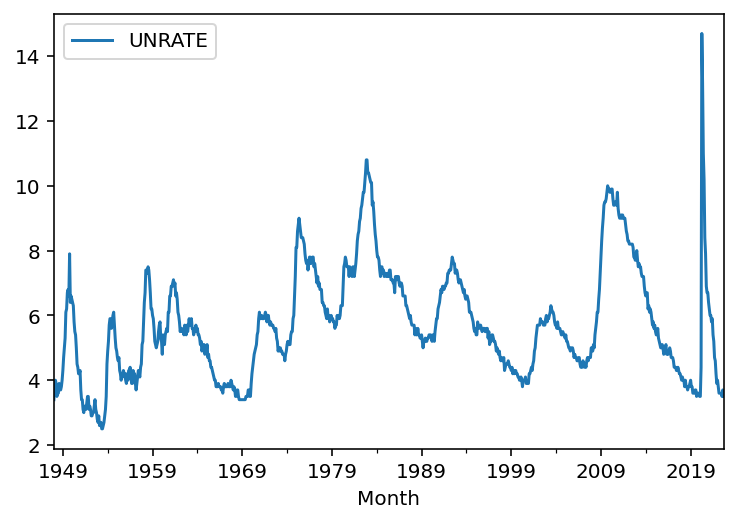

In [15]:
df.plot()

In [17]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
test_result=adfuller(df['UNRATE'])

In [20]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Unrate):
    result=adfuller(Unrate)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [21]:
adfuller_test(df['UNRATE'])

ADF Test Statistic : -3.874193586334319
p-value : 0.0022331938257814737
#Lags Used : 1
Number of Observations Used : 895
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

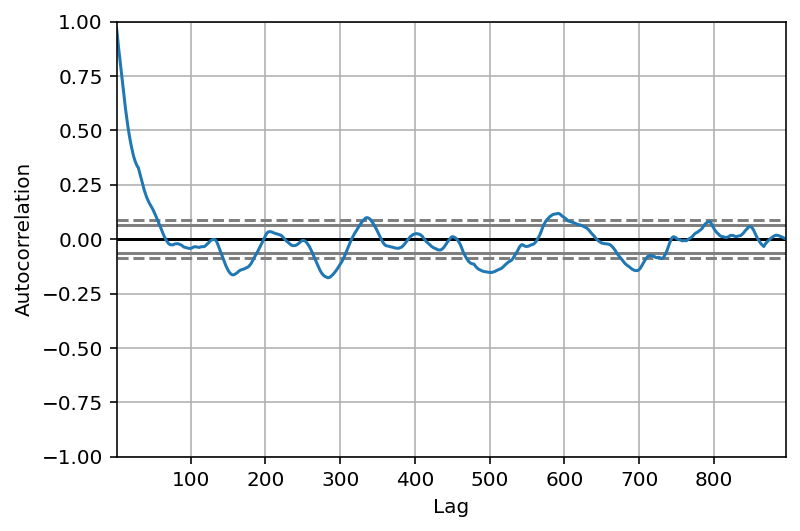

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['UNRATE'])
plt.show()

D:\Miniconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


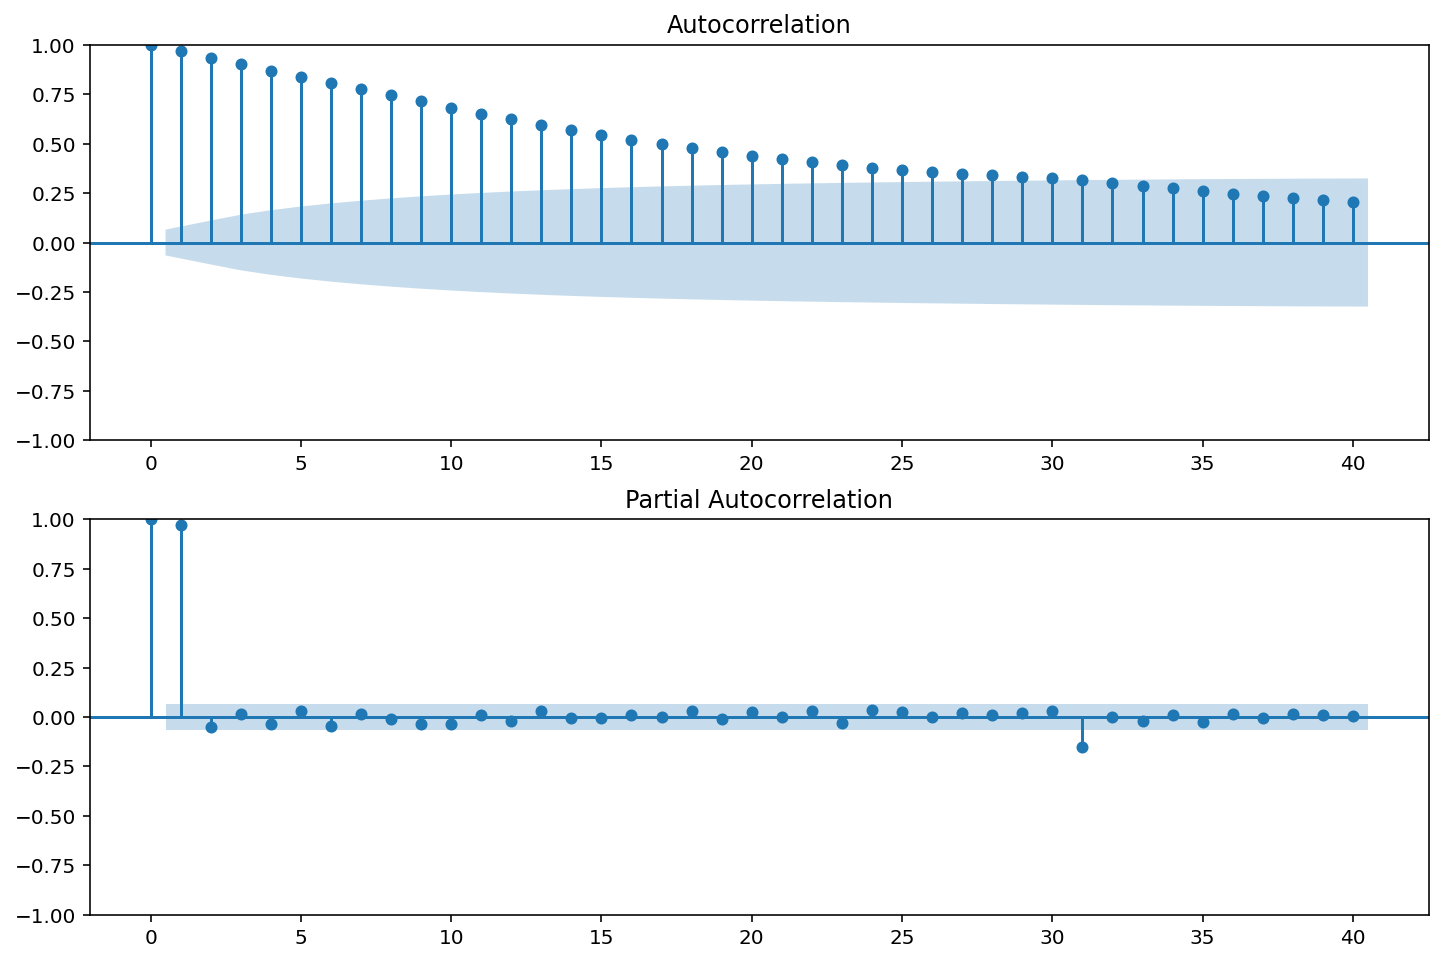

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['UNRATE'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['UNRATE'],lags=40,ax=ax2)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
from statsmodels.tsa.arima.model import ARIMA

In [217]:
model=ARIMA(df['UNRATE'],order=(1,0,40))
model_fit=model.fit()

D:\Miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Miniconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [218]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                  897
Model:                ARIMA(1, 0, 40)   Log Likelihood                -478.617
Date:                Thu, 01 Dec 2022   AIC                           1043.233
Time:                        19:09:53   BIC                           1249.593
Sample:                    01-01-1948   HQIC                          1122.077
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5976      0.707      7.920      0.000       4.212       6.983
ar.L1          0.9537      0.149      6.404      0.000       0.662       1.246
ma.L1          0.0801      0.148      0.540      0.589      -0.211       0.371
ma.L2         -0.0098      0.154     -0.064      0.949      -0.312       0.292
ma.L3          0.0502      0.146      0.344      0.731      -0.236       0.336
ma.L4         -0.0297      0.145     -0.205      0.838      -0.314       0.254
ma.L5          0.0558      0.135      0.414      0.679      -0.208       0.320
ma.L6         -0.0029      0.136     -0.021      0.983      -0.269       0.263
ma.L7          0.0271      0.140      0.194      0.846      -0.247       0.302
ma.L8          0.0463      0.133      0.349      0.727      -0.214       0.306
ma.L9          0.0411      0.133      0.310      0.757      -0.219       0.301
ma.L10        -0.0042      0.168     -0.025      0.980      -0.333       0.324
ma.L11         0.0337      0.133      0.253      0.800      -0.227       0.294
ma.L12        -0.0176      0.128     -0.137      0.891      -0.269       0.234
ma.L13         0.0221      0.125      0.177      0.860      -0.223       0.267
ma.L14         0.0189      0.154      0.123      0.902      -0.283       0.321
ma.L15        -0.0011      0.120     -0.009      0.992      -0.237       0.234
ma.L16         0.0219      0.117      0.187      0.851      -0.207       0.251
ma.L17        -0.0226      0.121     -0.186      0.852      -0.260       0.215
ma.L18         0.0204      0.113      0.180      0.857      -0.201       0.242
ma.L19        -0.0182      0.121     -0.150      0.881      -0.256       0.220
ma.L20         0.0012      0.102      0.012      0.991      -0.199       0.201
ma.L21        -0.0098      0.120     -0.082      0.935      -0.246       0.226
ma.L22         0.0176      0.091      0.193      0.847      -0.160       0.195
ma.L23        -0.0230      0.156     -0.148      0.882      -0.328       0.282
ma.L24        -0.0168      0.129     -0.130      0.897      -0.270       0.236
ma.L25        -0.0040      0.123     -0.033      0.974      -0.246       0.238
ma.L26        -0.0014      0.130     -0.011      0.991      -0.257       0.254
ma.L27        -0.0094      0.137     -0.069      0.945      -0.278       0.260
ma.L28         0.0029      0.141      0.020      0.984      -0.273       0.279
ma.L29        -0.0136      0.103     -0.132      0.895      -0.215       0.188
ma.L30         0.0080      0.153      0.052      0.958      -0.292       0.308
ma.L31        -0.0151      0.158     -0.096      0.924      -0.325       0.295
ma.L32         0.1076      0.146      0.739      0.460      -0.178       0.393
ma.L33         0.0588      0.163      0.360      0.719      -0.261       0.379
ma.L34         0.0664      0.164      0.406      0.685      -0.254       0.387
ma.L35        -0.0414      0.166     -0.249      0.804      -0.368       0.285
ma.L36        -0.0794      0.164     -0.485      0.628      -0.400       0.242
ma

In [219]:
df.describe()

,UNRATE,forecast
count,897.000000,10.000000
mean,5.739799,4.627110
std,1.701748,0.314817
min,2.500000,4.209396
25%,4.500000,4.300092
50%,5.500000,4.762105
75%,6.800000,4.858273
max,14.700000,5.001162


<AxesSubplot:xlabel='Month'>

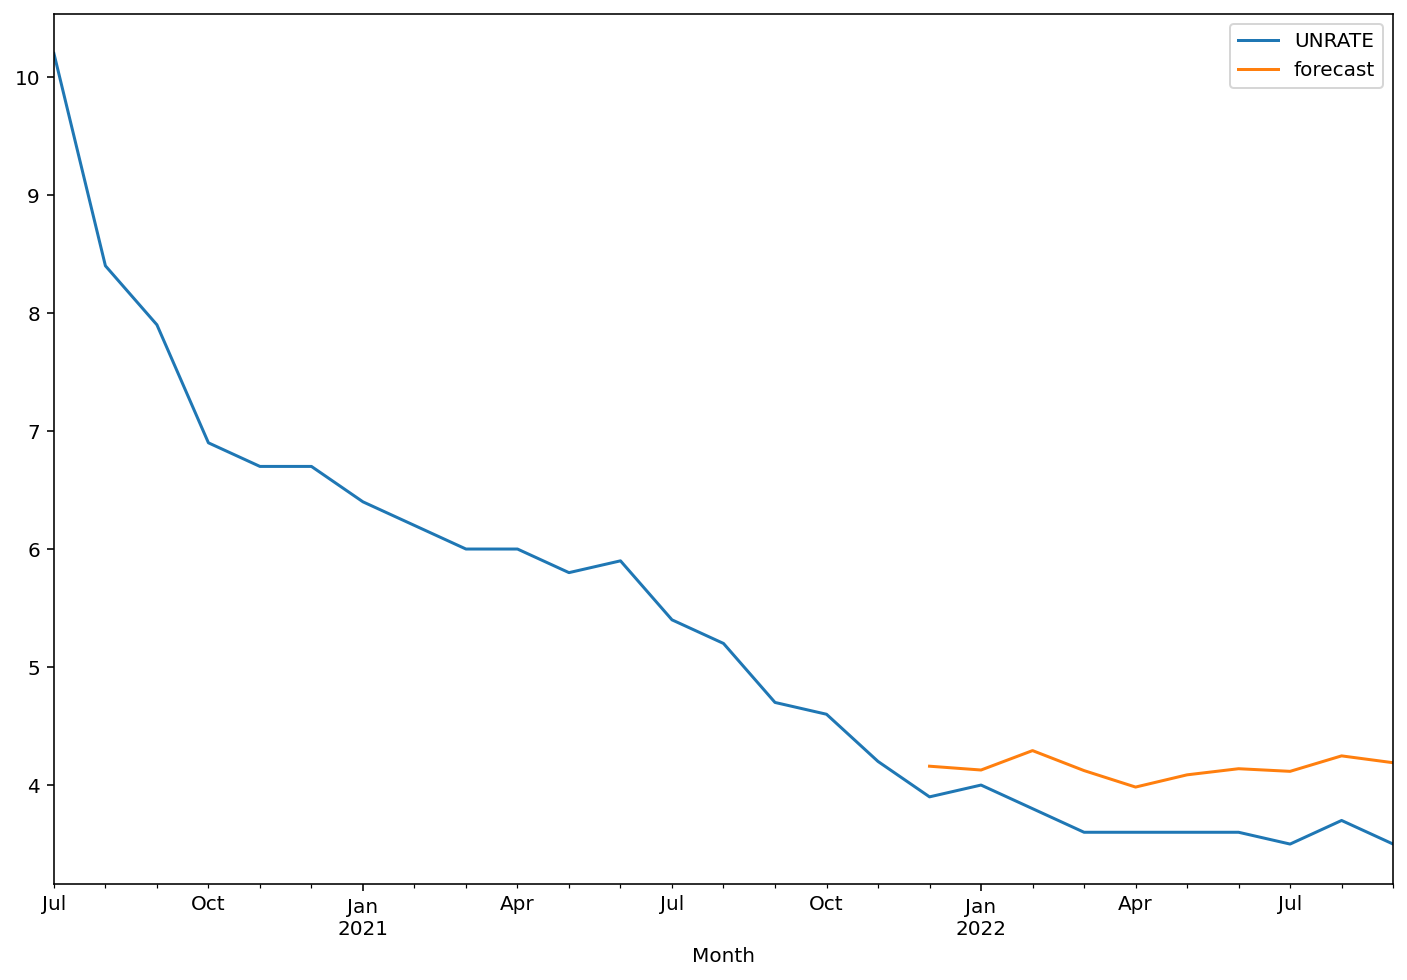

In [242]:
df['forecast']=model_fit.predict(start=887,end=897,dynamic=True)
df.iloc[870:][['UNRATE','forecast']].plot(figsize=(12,8))

In [292]:
df.tail()

,observation_date,UNRATE
892,2022-05-01,3.6
893,2022-06-01,3.6
894,2022-07-01,3.5
895,2022-08-01,3.7
896,2022-09-01,3.5


In [284]:
import pickle
filename1 = r'C:/Users/PMR LAB/Desktop/New folder/Arima_pickle/finalized_model_arima_1.pickle'
pickle.dump(model_fit, open(filename1, 'wb'))

In [243]:
import statsmodels.api as sm

In [271]:
model2=sm.tsa.statespace.SARIMAX(df['UNRATE'],order=(1, 0, 1),seasonal_order=(1,1,1,12))
results2=model2.fit()

D:\Miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

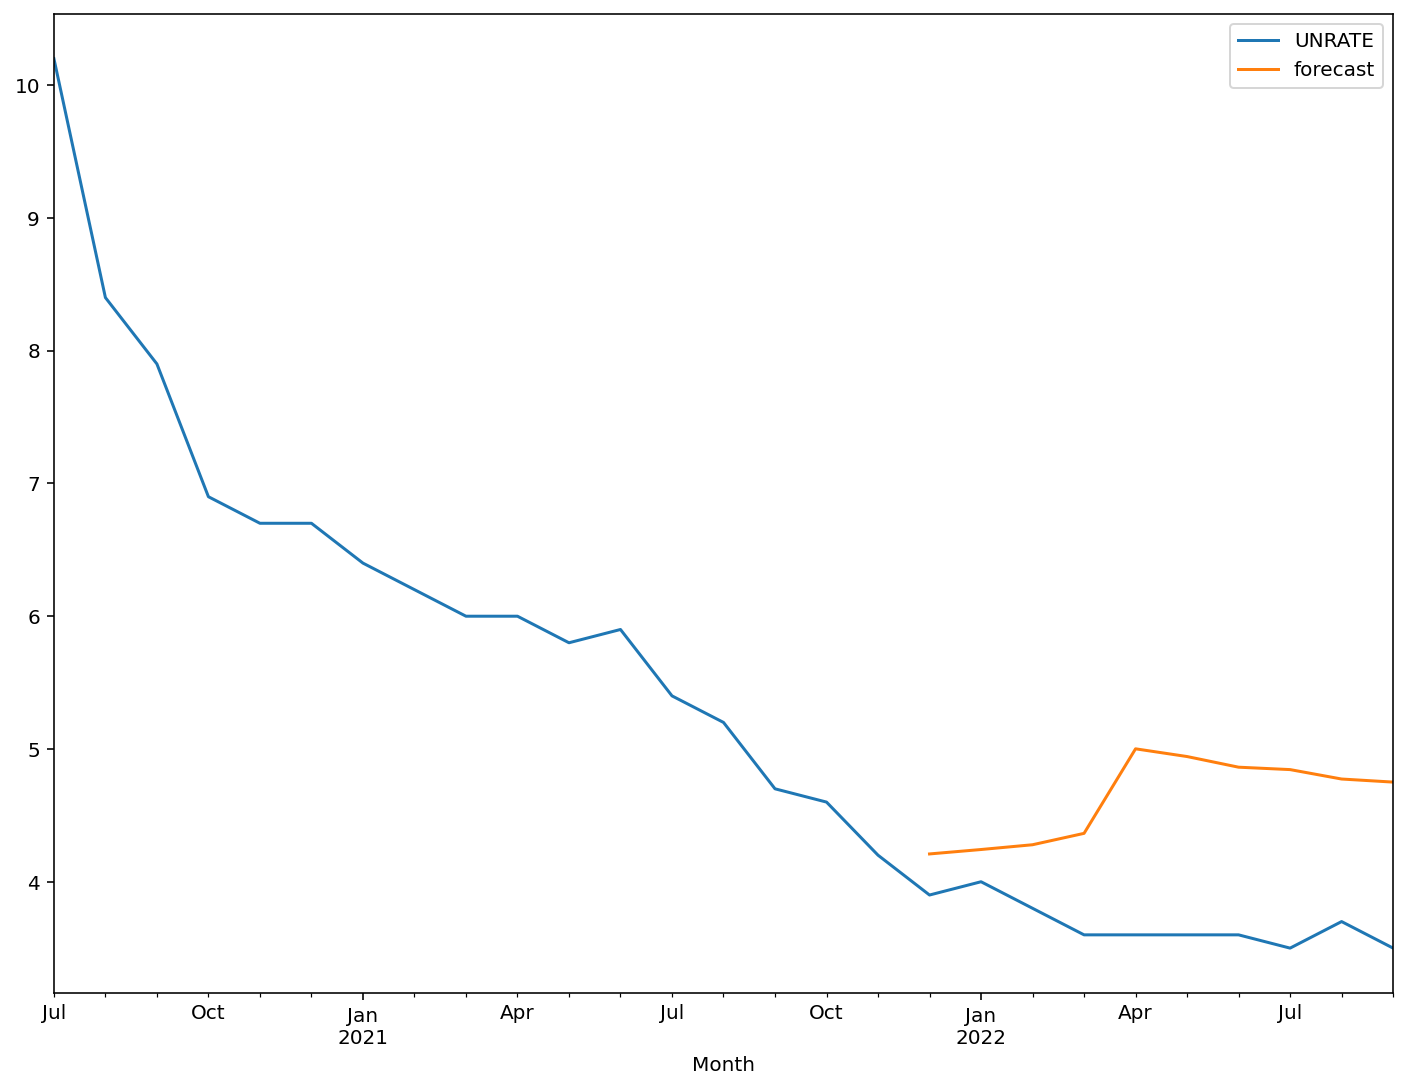

In [272]:
df['forecast']=results2.predict(start=887,end=897,dynamic=True)
df.iloc[870:][['UNRATE','forecast']].plot(figsize=(12,9))

In [273]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,72)]

In [274]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [275]:
future_datest_df.tail()

,UNRATE,forecast
2028-04-01,NaN,NaN
2028-05-01,NaN,NaN
2028-06-01,NaN,NaN
2028-07-01,NaN,NaN
2028-08-01,NaN,NaN


In [276]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

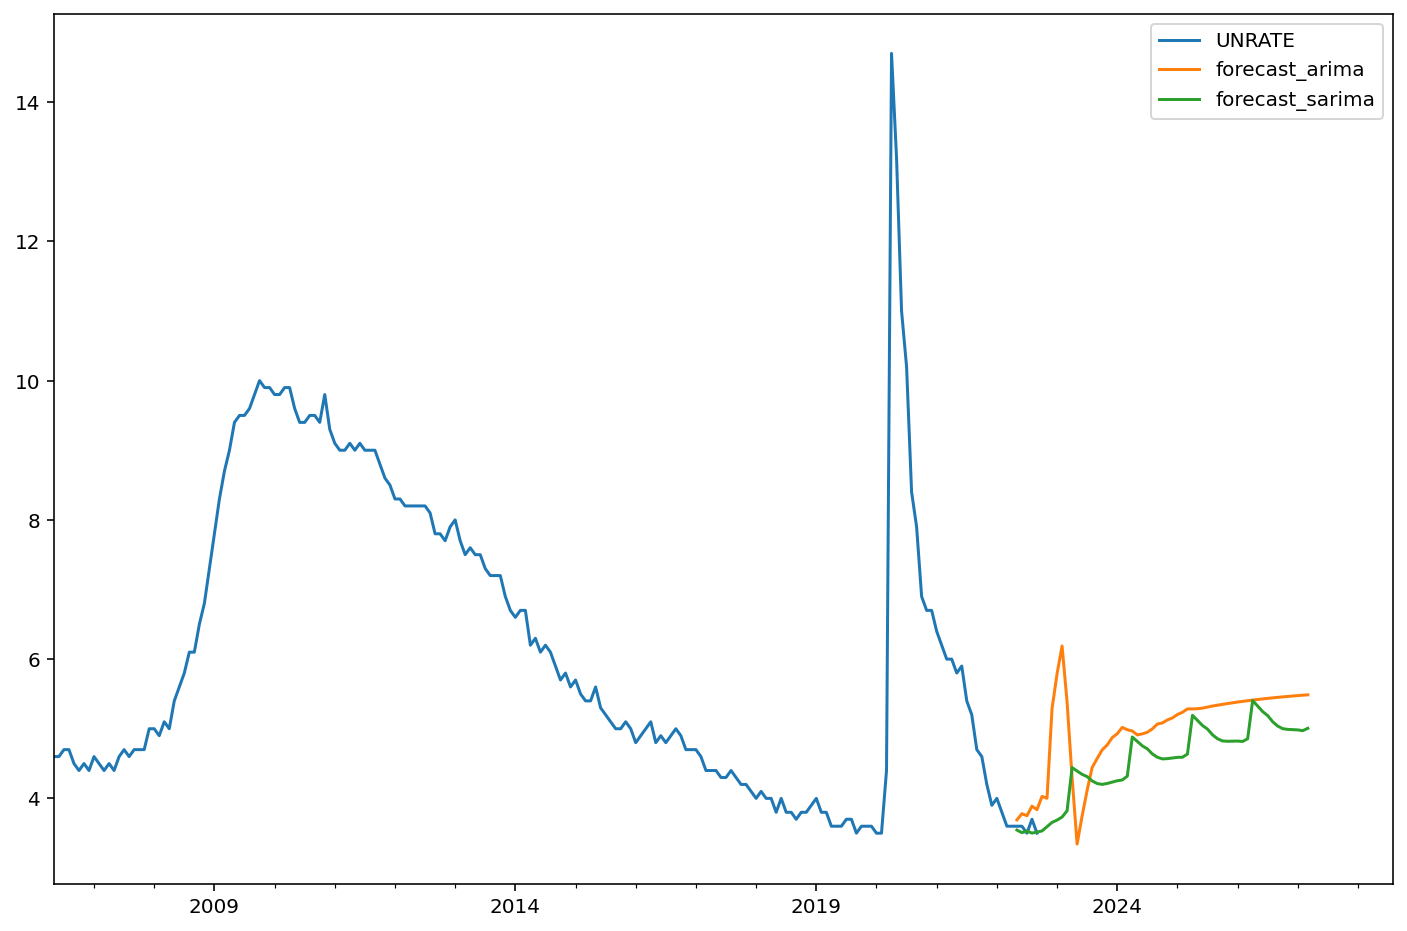

In [286]:
future_df['forecast_arima'] = model_fit.predict(start = 892, end = 950, dynamic= True)  
future_df['forecast_sarima'] = results2.predict(start = 892, end = 950, dynamic= True)  
future_df.iloc[700:][['UNRATE', 'forecast_arima', 'forecast_sarima']].plot(figsize=(12, 8)) 

In [280]:
filename2 = 'finalized_model_2.sav'
pickle.dump(model2, open(filename2, 'wb'))

In [281]:
results2.predict(start = 892, end = 950, dynamic= True)

2022-05-01    3.544643
2022-06-01    3.507649
2022-07-01    3.531430
2022-08-01    3.501028
2022-09-01    3.517232
2022-10-01    3.531960
2022-11-01    3.594084
2022-12-01    3.654742
2023-01-01    3.687801
2023-02-01    3.731635
2023-03-01    3.821778
2023-04-01    4.441805
2023-05-01    4.393952
2023-06-01    4.344380
2023-07-01    4.312522
2023-08-01    4.250570
2023-09-01    4.212913
2023-10-01    4.200959
2023-11-01    4.214001
2023-12-01    4.232864
2024-01-01    4.252981
2024-02-01    4.263842
2024-03-01    4.318468
2024-04-01    4.881651
2024-05-01    4.817980
2024-06-01    4.754392
2024-07-01    4.711828
2024-08-01    4.638019
2024-09-01    4.590414
2024-10-01    4.567131
2024-11-01    4.570731
2024-12-01    4.580062
2025-01-01    4.589117
2025-02-01    4.590612
2025-03-01    4.636396
2025-04-01    5.192495
2025-05-01    5.119360
2025-06-01    5.046514
2025-07-01    4.994787
2025-08-01    4.912198
2025-09-01    4.855981
2025-10-01    4.824464
2025-11-01    4.819983
2025-12-01 

In [285]:
# filename2 = 'finalized_model_2.sa'
pickle.dump(results2, open(r'C:/Users/PMR LAB/Desktop/New folder/Sarima_pickle/finalized_model_Sarima_1.pickle', 'wb'))